In [1]:
%pip install numpy
%pip install matplotlib
%pip install seaborn
%pip install scikit-learn


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [ ]:


import pandas as pd

# Create DataFrame
data = {
'Square_Feet': [750, 800, 850, 900, 950, 1000, 1050, 1100],
'Bedrooms': [2, 2, 3, 3, 3, 4, 4, 4],
'Price': [150000, 160000, 175000, 185000, 195000, 210000, 220000, 230000]
}

df = pd.DataFrame(data)

# Display DataFrame
print(df)

   Square_Feet  Bedrooms   Price
0          750         2  150000
1          800         2  160000
2          850         3  175000
3          900         3  185000
4          950         3  195000
5         1000         4  210000
6         1050         4  220000
7         1100         4  230000


Matplotlib is building the font cache; this may take a moment.


Square_Feet    0
Bedrooms       0
Price          0
dtype: int64
       Square_Feet  Bedrooms          Price
count     8.000000  8.000000       8.000000
mean    925.000000  3.125000  190625.000000
std     122.474487  0.834523   28465.204323
min     750.000000  2.000000  150000.000000
25%     837.500000  2.750000  171250.000000
50%     925.000000  3.000000  190000.000000
75%    1012.500000  4.000000  212500.000000
max    1100.000000  4.000000  230000.000000


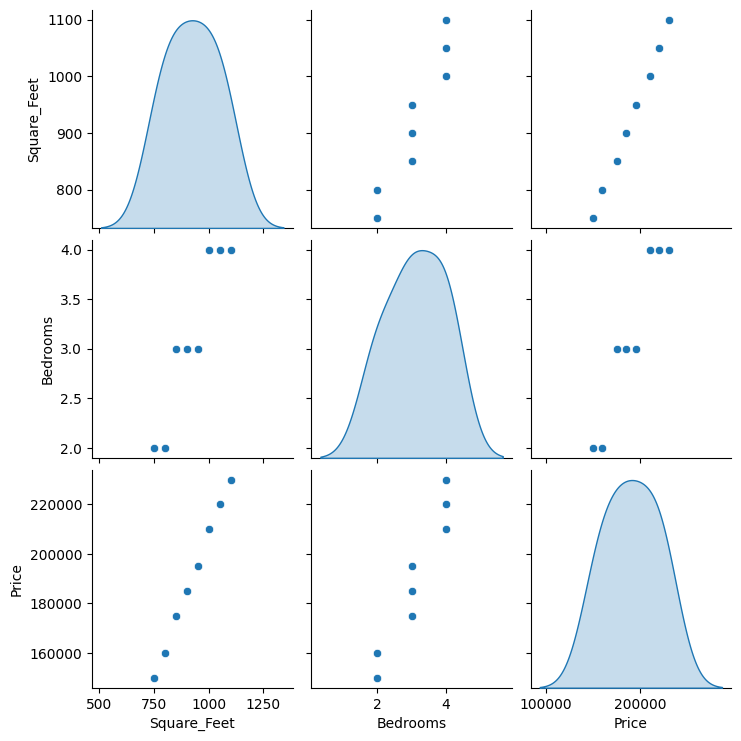

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Check for missing values
print(df.isnull().sum())

# Display basic statistics
print(df.describe())

# Visualizing relationships
sns.pairplot(df, diag_kind='kde')
plt.show()

In [11]:
from sklearn.model_selection import train_test_split

# Features (X) and Target (y)
X = df[['Square_Feet', 'Bedrooms']]
y = df['Price']

# Splitting dataset into Training and Testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display Training Data
print(X_train.head(), y_train.head())

   Square_Feet  Bedrooms
0          750         2
7         1100         4
2          850         3
4          950         3
3          900         3 0    150000
7    230000
2    175000
4    195000
3    185000
Name: Price, dtype: int64


In [13]:
from sklearn.linear_model import LinearRegression

# Initialize Linear Regression Model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Print Coefficients
print("Intercept (b0):", model.intercept_)
print("Coefficients (b1, b2):", model.coef_)

Intercept (b0): -9999.99999999997
Coefficients (b1, b2): [ 200. 5000.]


In [14]:
# Predict house prices using the test set
y_pred = model.predict(X_test)

# Compare Actual vs Predicted Prices
df_results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(X_test)
print(df_results)

   Square_Feet  Bedrooms
1          800         2
5         1000         4
   Actual  Predicted
1  160000   160000.0
5  210000   210000.0


In [15]:
%pip install joblib
import joblib

# Save Model and Scaler
joblib.dump(model, "linearreg_model.pkl")


Note: you may need to restart the kernel to use updated packages.


['linearreg_model.pkl']

In [17]:
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R-Squared Score: {r2}")

Mean Squared Error: 4.235164736271502e-22
Root Mean Squared Error: 2.0579515874459978e-11
R-Squared Score: 1.0


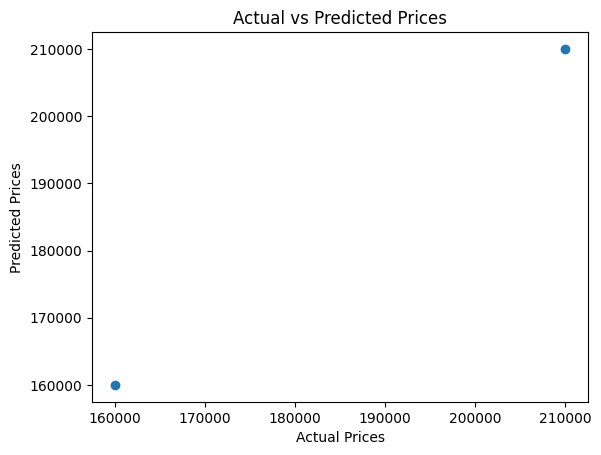

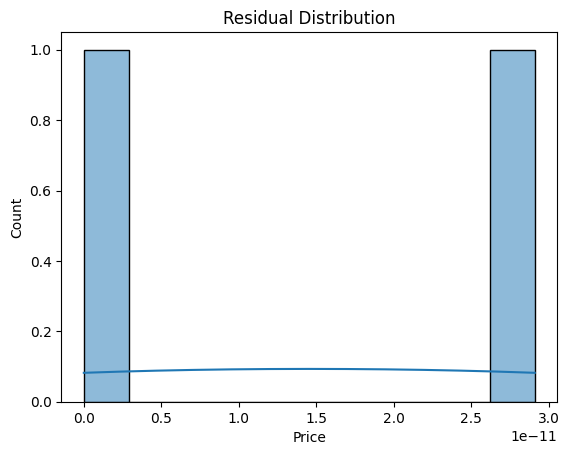

In [18]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices")
plt.show()

# Residual Plot
residuals = y_test - y_pred
sns.histplot(residuals, bins=10, kde=True)
plt.title("Residual Distribution")
plt.show()